First, we import the spreadsheet into a pandas dataframe

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

In [3]:
# Path where our spreadsheet is saved. We use the "r" before the string to tell python that it is a raw path.
path_to_spreadsheet = r"C:\Users\KKang2.LBL\Desktop\UC Davis\Glassfire_UCDavis\Data_for_plot\Bar_F1_a.xlsx"

In [4]:
#Now, we load the spreadsheet as a pandas dataframe.
df = pd.read_excel(path_to_spreadsheet,"Sheet1")

In [5]:
#Let's do a test with Silica. We will look at the elements exiting in the dataframe first.
df["element"].unique()

array(['SOC', 'IC', 'Si', 'Al', 'Ca', 'K', 'Mg', 'Na', 'P', 'S', 'Ti',
       'Fe', 'Mn'], dtype=object)

In [6]:
# Let's make a subdataframe just for Si. We reset the indexes, so that the rows in the new dataframe start from 0.
df_si = df.loc[
    df["element"] == "Si"
].reset_index(drop=True)

In [7]:
#Let's drop NAS (drop the empty cell)
df_si = df_si[~df_si["concentration"].isna()].reset_index(drop=True)

In [8]:
df_si["concentration"].values

array([152000., 194000., 113000., 184000., 252000., 214000., 167000.,
       177000., 131000., 133000., 256000., 162000.])

In [9]:
# We will make dummy plot positions to set "x" value to 1
x = np.ones(df_si.shape[0])
df_si.shape

(12, 3)

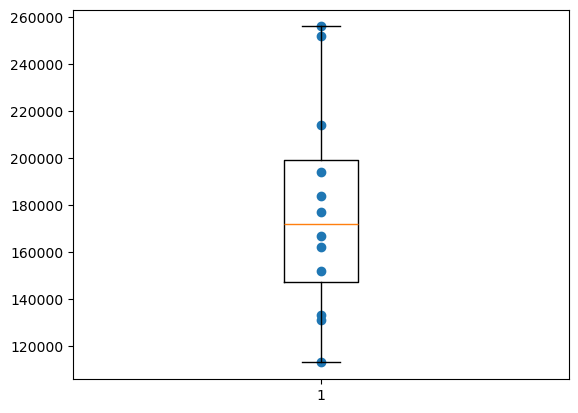

In [10]:
#This portion initiate the matplotlib figure object
fig, ax = plt.subplots()

#box plot
ax.boxplot(df_si["concentration"].values)
#scatter plot
ax.scatter(x,df_si["concentration"].values)
plt.show()
plt.close()

In [11]:
# Now, we will try for all of the elements for one type of soil.
df_ash = df.loc[
    df["soil"] == "ash"
].reset_index(drop=True)


In [12]:
# Now, we will make a 2D array that will contain all the values.
#Let's get the elements for which we have ash samples.
ash = []

In [13]:
#Let's drop NAS (drop the empty cell)
df_ash = df_ash[~df_ash["concentration"].isna()].reset_index(drop=True)


In [14]:
#what is the elements existing in ash sample?

ash_elements = df_ash["element"].unique()


In [15]:
# Seperate the concentration values for each element

for element in ash_elements:
    concentrations_dum = df_ash.loc[
        df_ash["element"]==element,
        "concentration"
    ].to_list()
    ash.append(concentrations_dum)


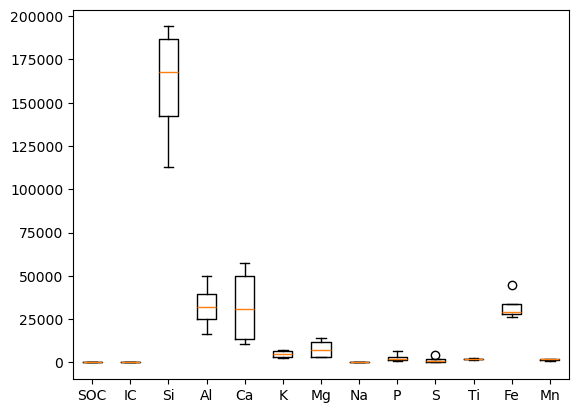

In [16]:
#plot for ash samples

fig, ax = plt.subplots()
ax.boxplot(ash)

#Let's set x labels

ax.set_xticklabels(ash_elements)

plt.show()
plt.close()

Let's try for more than one soil now

In [17]:
df = df[~df["concentration"].isna()].reset_index(drop=True)
df
elements = df["element"].unique()
elements
soil_types = df["soil"].unique()
soil_types


array(['ash', '2-years-burned', '2-years-unburned', 'vegetation'],
      dtype=object)

C:\Users\KKang2.LBL\AppData\Local\Temp\ipykernel_11368\694421992.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scat_coords_df = pd.concat([scat_coords_df, scat_coords_df_dum], ignore_index=True)


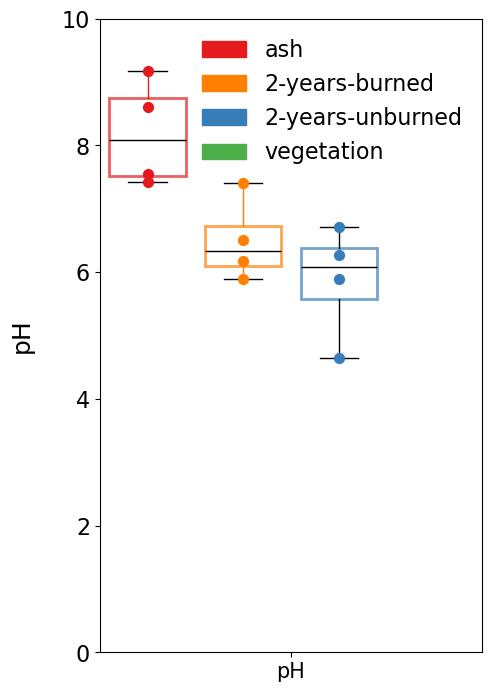

In [36]:
# Path where our spreadsheet is saved. We use the "r" before the string to tell python that it is a raw path.
path_to_spreadsheet = r"C:\Users\KKang2.LBL\Desktop\UC Davis\Glassfire_UCDavis\Data_for_plot\Bar_F1_f.xlsx"

#Now, we load the spreadsheet as a pandas dataframe.
df = pd.read_excel(path_to_spreadsheet,"Sheet1")

# List of colors for soil types- colors_dic is dictionary and "" is string
colors_dic = {"ash": "#e41a1c", "2-years-burned": "#ff7f00", "2-years-unburned": "#377eb8", "vegetation": "#4daf4a"}

# Is command in pandas, df["soil"] does extract the "soil" column from data frame df., 
#function ".unique()" returns the unique values from soil column. It remove any duplicate entries, so i can get only distict values.
soil_types = df["soil"].unique()
elements = df["element"].unique()

#element for element in elements: this iterates over each item(element) in the existing list
#if element not in [] : this is conditional statement that checks if each element is not in the list of ["SOC", "IC", ..]
#elements = [element for element in elements if element not in ["SOC", "IC","Si","Fe","Mn"]]
#or
elements=["pH"]

# Initialize empty lists for data storage
vals_dum = []  # Box plot values- holding a collection of values for each catagory- concentrations of elements in different soil types.
xtick_locs = []  # X-axis tick locations- storing the x-tick poistion where ticks will be places
xtick_labs = []  # X-axis labels -element names that will be shown in x-axis

# creating an empty pandas dataframe with specific column names "x","y","element","soil"
scat_coords_df = pd.DataFrame(columns=["x", "y", "element", "soil"])

x_position = 1  # X-position for plotting elements, 0 will incur the mixmatch of the scatter and box plot because box plot has a default x position as 0. 
element_pos_dict = {}  # Keep track of element positions for grouping in x-ticks- important for labeling the x-axis correctly 

# a nested loop that processes data related to concentrations of elements in different soil types
for element in elements:
    concentrations_by_soil = [] #temporarily store the concentration values of the current element for each soil tytpe
    
    # for each soil type, it retrieves the concentration values for the current elements
    for soil in soil_types:
        #function".loc[]" -selecting the rows where the "element" column equals the current "element" and the "soil" column equals the current "soil"
        concentrations_dum = df.loc[(df["element"] == element) & (df["soil"] == soil), "concentration"].to_list() #convert the filtered values into a list
        
        #checking whether concentration_dum is not empty
        if concentrations_dum:
            concentrations_by_soil.append(concentrations_dum)  # Collect all concentrations for the specific element
            
            # for scatter plot purpose, a DataFrame scat_coords_df_dum is created for the current element and soil type
            scat_coords_df_dum = pd.DataFrame({
                "y": concentrations_dum,
                "x": [x_position] * len(concentrations_dum), # for Al, x-position is 1 and it repeated for the length of "concentration_dum"
                "element": [element] * len(concentrations_dum),
                "soil": [soil] * len(concentrations_dum)
            })
            scat_coords_df = pd.concat([scat_coords_df, scat_coords_df_dum], ignore_index=True)

        #adding the concentration values for the current element and soil type to vals_dum
        vals_dum.append(concentrations_dum)
        xtick_locs.append(x_position)
        
        # Track first position for the current element to place x-tick later
        #evaluating to "True" or "False" whether the element is already present 
        if element not in element_pos_dict:
            element_pos_dict[element] = x_position #records the current x-axis position for the element.
        x_position += 1  # Increment x-position for next soil type

# Plotting the data
fig, ax = plt.subplots(figsize=(5, 7))

# Create the box plot
bplot = ax.boxplot(vals_dum, patch_artist=True, widths=0.8, boxprops={'linewidth': 2}, zorder=1, showfliers=False)

# Plot the scatter points
#check if the dataframe scat_coor_df is not empty
if not scat_coords_df.empty:
    #idx is the index in the loop
    for idx, x in enumerate(xtick_locs): 
        # filter the scat_coords_df Dataframe to extract only the rows where the x-position matches the current x value in the loop- as a results
        #only the data points for the current x position will be plotted for scatter plot
        scat_coords_df_dum = scat_coords_df[scat_coords_df["x"] == x]

        #now the look iterates through each unique soil type present in the subset 
        for soil in scat_coords_df_dum["soil"].unique():
            # Get the scatter data for the specific soil type
            soil_scatter_data = scat_coords_df_dum[scat_coords_df_dum["soil"] == soil]
            ax.scatter(
                soil_scatter_data["x"], soil_scatter_data["y"],
                s=50, c=colors_dic[soil], label=soil, zorder=2
            )

# Set properties for the boxplot (colors for boxes according to soil type)
for idx, patch in enumerate(bplot['boxes']):
    # Determine the soil type for each box and set the color accordingly
    box_color = colors_dic[soil_types[idx % len(soil_types)]]
    patch.set(facecolor="white", edgecolor=box_color, alpha=0.7)

# Whiskers and medians colors
for whisker, median in zip(bplot['whiskers'], bplot['medians']):
    soil_idx = xtick_locs.index(whisker.get_xdata()[0])
    soil_type = soil_types[soil_idx % len(soil_types)]
    whisker.set(color=colors_dic[soil_type])
    median.set(color="black")

# Simplified x-ticks (only elements, no soil types)
ax.set_xticks([element_pos_dict[element] + (len(soil_types)-1)/2 for element in elements])  # Position at the center of soil boxes
ax.set_xticklabels(elements, fontsize = 15)

# Set y-axis to log scale
#ax.set_yscale('log')
#\u207B is the Unicode for the superscript minus (⁻).\u207B is the Unicode for the superscript minus (⁻).
#labelpad is space between ticks and label.
ax.set_ylabel("pH", fontsize = 18, labelpad=20) #"solid concentration (mg kg\u207B\u00B9)"
#ax.set_ylabel("[metal]/[Ti]", fontsize = 18, labelpad=15) 
ax.tick_params(axis='y', labelsize=16)

# Add a legend for soil types
legend_elements = [Patch(facecolor=color, edgecolor=color, label=soil) for soil, color in colors_dic.items()]
ax.legend(handles=legend_elements, fontsize =16, frameon=False)

# Set plot limits
#ax.set_ylim(np.power(10.0, 0), np.power(10.0, 4))
#or
#ax.set_ylim(10**-3, 10**1)
ax.set_ylim(0,10)
#ax.set_yticks([0,5,10,15])

file_name = "Fig_1_b.png"
file_path = "C:/Users/KKang2.LBL/Desktop/UC Davis/Glassfire_UCDavis/Data_for_plot/"
plt.tight_layout(pad=1) # prevent incomplete figure (some imaged got cut)
plt.savefig(file_path + file_name) # prevent incomplete figure (some imaged got cut)

# Show the plot
plt.show()

